In [77]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import glob

In [63]:
def read_parameters(file):
    with open(file, 'r') as f:
        data = f.read().splitlines()
    for line in data:
        if line.startswith('TEFF'):
            teff = int(line.split('=')[-1].strip())
        elif line.startswith('LOG_G'):
            log_g = float(line.split('=')[-1].strip())
    return teff, log_g

def read_spectrum(file):
    with open(file, 'r') as f:
        data = f.read().splitlines()
    wavl, flux = [], []
    end_found = False
    for line in data:
        if end_found:
            parts = line.split()
            if len(parts) == 2:  # Ensure it has two values
                wavl.append(float(parts[0]))
                flux.append(float(parts[1]))
        elif line.strip() == 'END':
            end_found = True
    return wavl, flux

def interpolate_onto_best(wavls, fluxes):
    # Find the wavelength grid with the highest resolution
    highest_res_index = np.argmax([len(w) for w in wavls])
    common_wavelengths = wavls[highest_res_index]
    print(len(common_wavelengths), highest_res_index)
    # Interpolate all fluxes onto the common wavelength grid
    interpolated_fluxes = []
    for w, f in zip(wavls, fluxes):
        interp_func = interp1d(w, f, kind='cubic', bounds_error=False)
        interpolated_fluxes.append(interp_func(common_wavelengths))
    return np.array(common_wavelengths), np.array(interpolated_fluxes)

def process_dataset(type = 'DA'):
    assert type in ['DA', 'DB', 'ELM']
    da_files = glob.glob(f'koester/{type}/*.dk')
    # read in the parameters from each file
    theta, fluxes, wavls = [], [], []
    for file in da_files:
        theta.append(read_parameters(file))
        wavl, flux = read_spectrum(file)
        fluxes.append(flux)
        wavls.append(wavl)
    theta = np.array(theta)
    # interpolate onto the best grid
    wavl_grid, interp_flux = interpolate_onto_best(wavls, fluxes)
    # save the results
    np.save(f'koester/{type}/theta.npy', theta)

26929 118


In [83]:
len(wavls[118]), min(wavls[118]), max(wavls[118]), len(interp_flux)

(26929, 900.134, 29462.618, 1104)

(9250, 7.0)


(6549.0, 6579.0)

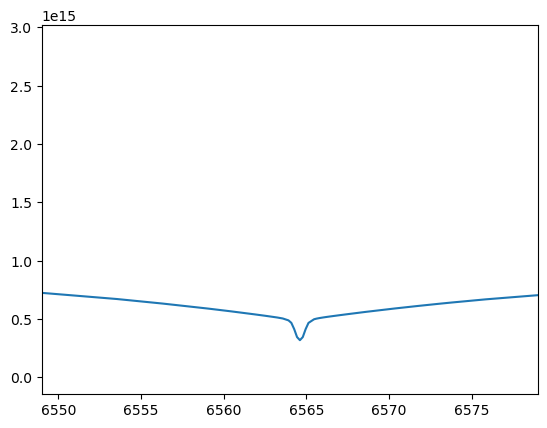

In [87]:
i = 300
print(theta[i])
plt.plot(wavl_grid, interp_flux[i])
plt.xlim(6564-15, 6564+15)

In [14]:
wav

["MODE    = 'TABLE   '          ",
 'HEADER  =          3000/ 7.000',
 'TEFF    =                 3000',
 'LOG_G   =                7.000',
 'COMMENT   ATM: Revision: ddcc9efe1079                                          ',
 'COMMENT   ATM: Calc: 2023-06-29  09:03:29                                            ',
 'COMMENT   KAP: Revision: ddcc9efe1079                                          ',
 'COMMENT   KAP: Calc: 2023-06-29  09:03:26                                            ',
 'COMMENT   SYN: Author: Detlev_Koester                                          ',
 'COMMENT   SYN: Revision: edd518a5c31f                                          ',
 'COMMENT   SYN: Date: 2022/07/22 08:39:46                                       ',
 'COMMENT   SYN: Calc: 2023-06-29  09:04:53                                            ',
 'COMMENT   el    1        0.000',
 'COMMENT   lines atm         27',
 'COMMENT   lines syn        782',
 'COMMENT      Convection ML2 /T',
 'COMMENT            ZETA = 0.